---


---

1. Positin_salary

c:\Users\DHARANI\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
26695878787.878784
 Models Trained Successfully!
 Models Trained Successfully!
210343822.84381685


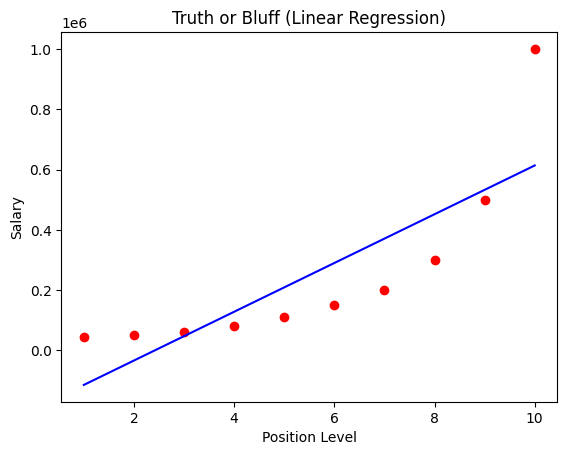

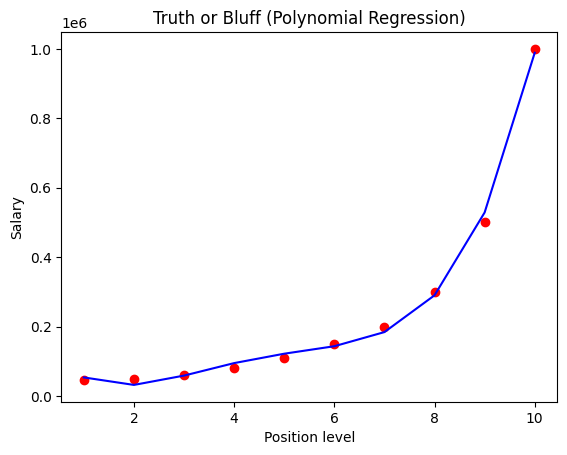

C:\Users\DHARANI\AppData\Local\Temp\ipykernel_20548\3102112464.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


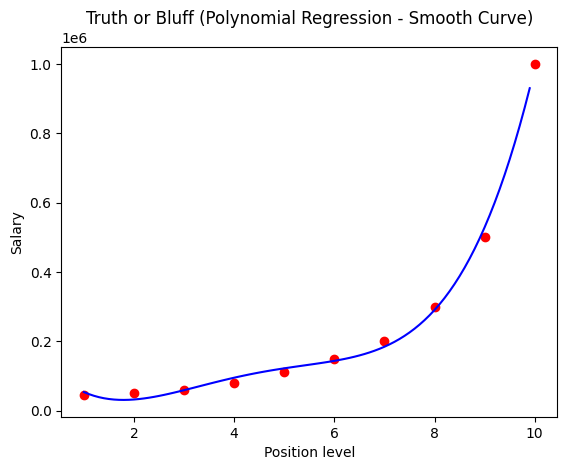

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265155]


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error
 
# from google.colab import drive
 
# # Mount your Drive
# drive.mount('/content/drive')
 
# # Once mounted, navigate to the folder
# # Example path (adjust based on your structure)
# path = '/content/drive/My Drive/Data Sets/Position_Salaries.csv'

# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())
 
 
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)          # ADDED (prediction needed for error)
y_test = y                            # ADDED (since model is trained on whole dataset)

l_err = mean_squared_error(y_test, y_pred)
print(l_err)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)  #degree 4==> x^4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print(" Models Trained Successfully!")

y_pred = lin_reg_2.predict(X_poly)    # ADDED (prediction needed for error)
y_test = y                            # ADDED

print(" Models Trained Successfully!")

p_err = mean_squared_error(y_test, y_pred)
print(p_err)
 
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
  
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 

----
2. Car priceprediction


🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.
 
📝 Tasks

Load the dataset and identify the relevant columns.

Use:

Engine size as the input feature

Car price as the output variable

Visualize the relationship between engine size and price.

Build a predictive model to estimate car price based on engine size.

Predict the price for a car with:

Engine size = 200
 

In [2]:
import pandas as pd

df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
X=df[["enginesize"]].values
y=df["price"].values
X,y

(array([[130],
        [130],
        [152],
        [109],
        [136],
        [136],
        [136],
        [136],
        [131],
        [131],
        [108],
        [108],
        [164],
        [164],
        [164],
        [209],
        [209],
        [209],
        [ 61],
        [ 90],
        [ 90],
        [ 90],
        [ 90],
        [ 98],
        [ 90],
        [ 90],
        [ 90],
        [ 98],
        [122],
        [156],
        [ 92],
        [ 92],
        [ 79],
        [ 92],
        [ 92],
        [ 92],
        [ 92],
        [110],
        [110],
        [110],
        [110],
        [110],
        [110],
        [111],
        [ 90],
        [ 90],
        [119],
        [258],
        [258],
        [326],
        [ 91],
        [ 91],
        [ 91],
        [ 91],
        [ 91],
        [ 70],
        [ 70],
        [ 70],
        [ 80],
        [122],
        [122],
        [122],
        [122],
        [122],
        [122],
        [140],
        [1

In [5]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_test

(array([[134],
        [120],
        [ 92],
        [ 97],
        [110],
        [ 90],
        [108],
        [152],
        [156],
        [ 90],
        [171],
        [103],
        [122],
        [ 97],
        [136],
        [146],
        [ 70],
        [194],
        [ 92],
        [108],
        [181],
        [122],
        [140],
        [110],
        [ 92],
        [164],
        [ 92],
        [151],
        [110],
        [ 98],
        [121],
        [108],
        [ 91],
        [120],
        [ 98],
        [110],
        [156],
        [ 92],
        [ 98],
        [ 90],
        [121],
        [141],
        [134],
        [152],
        [ 92],
        [119],
        [ 98],
        [194],
        [122],
        [ 97],
        [ 92],
        [152],
        [122],
        [ 90],
        [121],
        [ 97],
        [ 92],
        [108],
        [130],
        [ 98],
        [136],
        [ 98],
        [194],
        [141],
        [108],
        [136],
        [ 

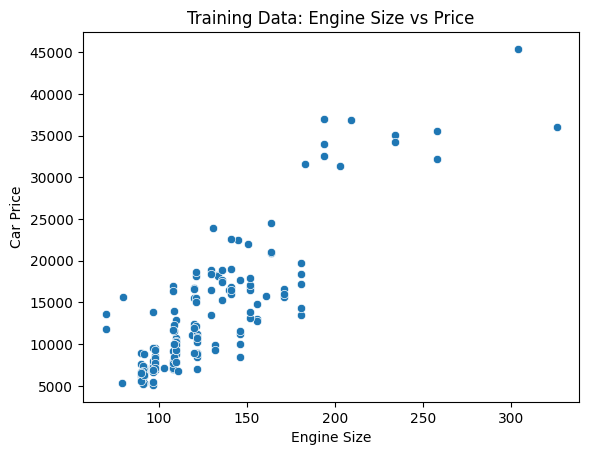

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x_train.flatten(), y=y_train)
plt.title("Training Data: Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.show()


Slope (m): 165.8445625610323
Intercept (c): -7741.765067166594
r2_score= 0.8040958796678975
Mean Squared Error: 15465458.96590847


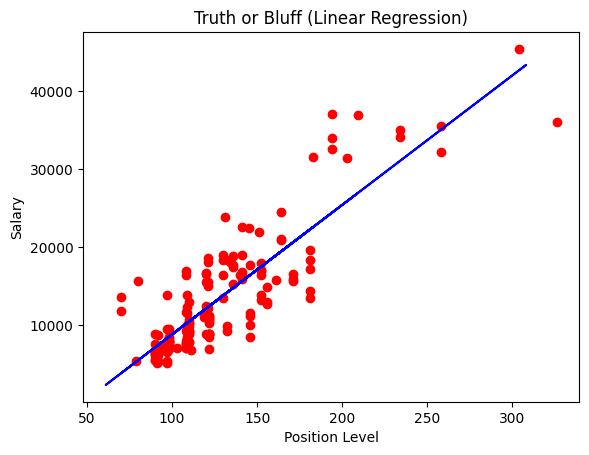

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train, y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2_score=",r2)

print("Mean Squared Error:", mse)

# Plotting using TEST data to match predictions
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=3)

X_train_poly = poly_reg.fit_transform(x_train)
X_test_poly = poly_reg.transform(x_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [11]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)


y_test shape: (41,)
y_pred shape: (41,)


In [12]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test_poly)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.8527894915178168
RMSE: 11621389.455322495


C:\Users\DHARANI\AppData\Local\Temp\ipykernel_20548\576292465.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 1).reshape(-1, 1)


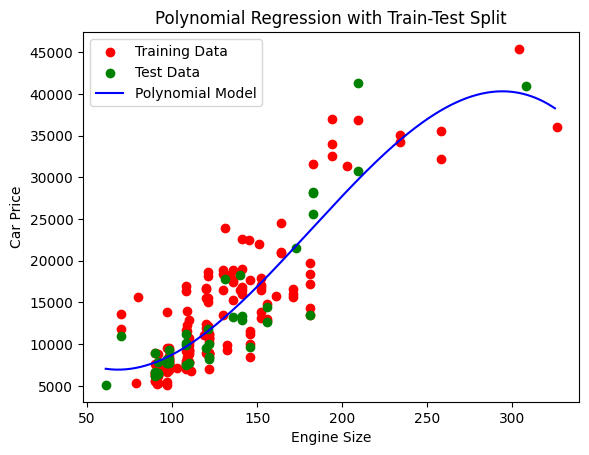

In [13]:
import numpy as np

X_grid = np.arange(min(X), max(X), 1).reshape(-1, 1)

plt.scatter(x_train, y_train, color='red', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(
    X_grid,
    model.predict(poly_reg.transform(X_grid)),
    color='blue',
    label='Polynomial Model'
)

plt.title("Polynomial Regression with Train-Test Split")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.legend()
plt.show()


In [14]:
predicted_price = model.predict(
    poly_reg.transform([[200]])
)

print("Predicted price for engine size 200:", predicted_price)


Predicted price for engine size 200: [27760.60834538]


In [ ]:
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)  #degree 4==> x^4
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 


y_pred_poly = lin_reg_2.predict(X_poly)    # ADDED (prediction needed for error)
y_test = y                            # ADDED



p_err = mean_squared_error(y_test, y_pred)
print(p_err)
 
  
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 


ValueError: Found input variables with inconsistent numbers of samples: [205, 41]


Increase the flexibility of your model and observe how the curve changes.

Compare predictions from:

a simple straight-line model

a curved model

Analyze which model:

captures the trend better

gives more realistic predictions

Evaluate prediction errors and interpret them in business terms.

Answer the following:

Why does a straight-line model fail here?

What risk occurs if the curve becomes too flexible?

Which model would you recommend for production and why?A
 

C:\Users\DHARANI\AppData\Local\Temp\ipykernel_20548\520296611.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


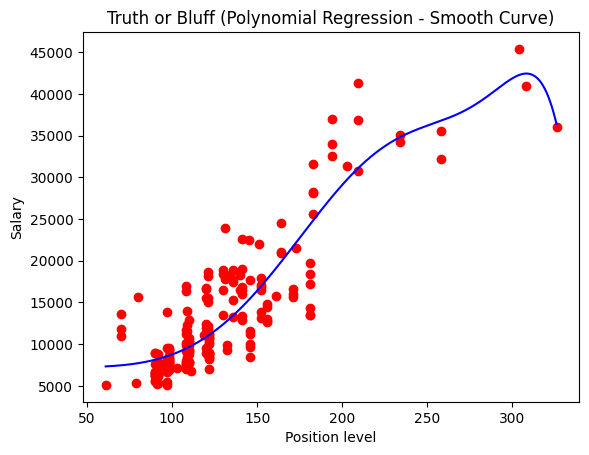

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [7219.46989645]


In [16]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)

In [ ]:
# --- Evaluation ---
print("Linear R²:", r2_score(y_test, y_pred))
print("Linear MSE:", mean_squared_error(y_test, y_pred))
print("Polynomial R²:", r2_score(y_test, y_pred_poly))
print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))



ValueError: Found input variables with inconsistent numbers of samples: [205, 41]

ValueError: x and y must be the same size

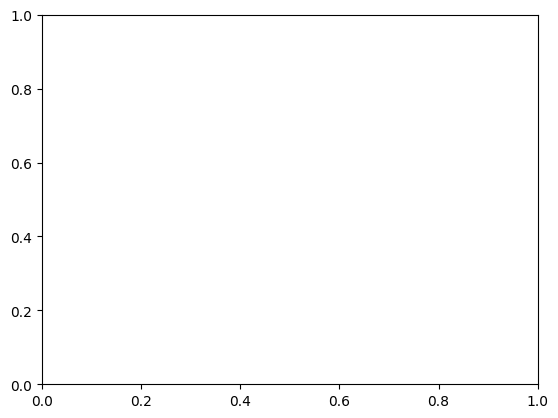

In [286]:
# --- Plot comparison ---
plt.scatter(x_test, y_test, color='red', label='Actual Prices')
plt.plot(x_test, y_pred, color='blue', label='Linear Prediction')
plt.scatter(x_test, y_pred_poly, color='green', label='Polynomial Prediction')
plt.title("Linear vs Polynomial Regression")
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.legend()
plt.show()

---

In [287]:
import pandas as pd

df=pd.read_csv("CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [288]:
X=df[["enginesize"]].values.reshape(-1,1)
y=df["price"].values
X,y

(array([[130],
        [130],
        [152],
        [109],
        [136],
        [136],
        [136],
        [136],
        [131],
        [131],
        [108],
        [108],
        [164],
        [164],
        [164],
        [209],
        [209],
        [209],
        [ 61],
        [ 90],
        [ 90],
        [ 90],
        [ 90],
        [ 98],
        [ 90],
        [ 90],
        [ 90],
        [ 98],
        [122],
        [156],
        [ 92],
        [ 92],
        [ 79],
        [ 92],
        [ 92],
        [ 92],
        [ 92],
        [110],
        [110],
        [110],
        [110],
        [110],
        [110],
        [111],
        [ 90],
        [ 90],
        [119],
        [258],
        [258],
        [326],
        [ 91],
        [ 91],
        [ 91],
        [ 91],
        [ 91],
        [ 70],
        [ 70],
        [ 70],
        [ 80],
        [122],
        [122],
        [122],
        [122],
        [122],
        [122],
        [140],
        [1

In [289]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train,x_test


(array([[134],
        [120],
        [ 92],
        [ 97],
        [110],
        [ 90],
        [108],
        [152],
        [156],
        [ 90],
        [171],
        [103],
        [122],
        [ 97],
        [136],
        [146],
        [ 70],
        [194],
        [ 92],
        [108],
        [181],
        [122],
        [140],
        [110],
        [ 92],
        [164],
        [ 92],
        [151],
        [110],
        [ 98],
        [121],
        [108],
        [ 91],
        [120],
        [ 98],
        [110],
        [156],
        [ 92],
        [ 98],
        [ 90],
        [121],
        [141],
        [134],
        [152],
        [ 92],
        [119],
        [ 98],
        [194],
        [122],
        [ 97],
        [ 92],
        [152],
        [122],
        [ 90],
        [121],
        [ 97],
        [ 92],
        [108],
        [130],
        [ 98],
        [136],
        [ 98],
        [194],
        [141],
        [108],
        [136],
        [ 

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train, y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

print("---test---")
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("mse=",mse)
r2 = r2_score(y_test, y_pred)
print("r2_score=",r2)

print("---train---")
train_pred=model.predict(x_train)
mse = mean_squared_error(y_train, train_pred)
print("mse=",mse)
r21 = r2_score(y_train, train_pred)
print("r2_score=",r21)






Slope (m): 165.8445625610323
Intercept (c): -7741.765067166594
---test---
mse= 15465458.96590847
r2_score= 0.8040958796678975
---train---
mse= 14867384.484978024
r2_score= 0.7507055061579612


In [291]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

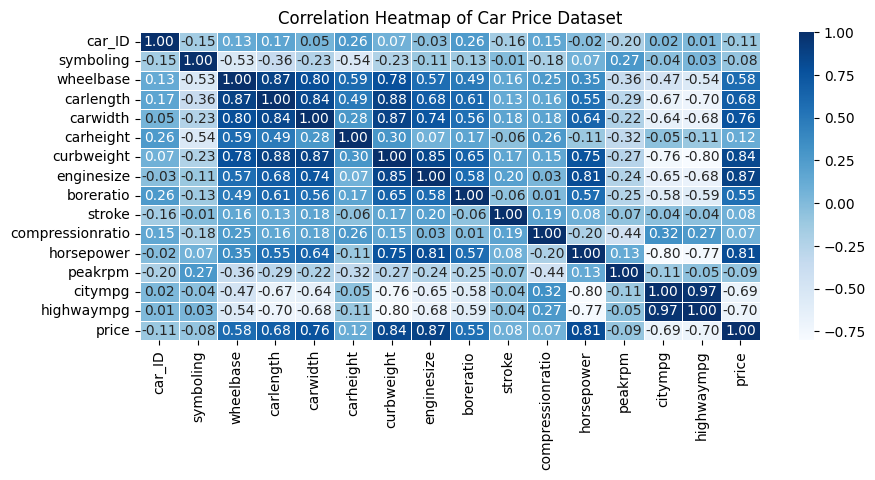

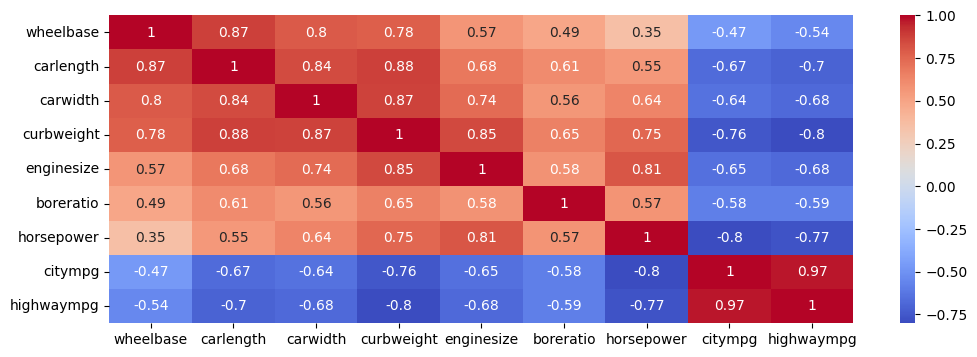

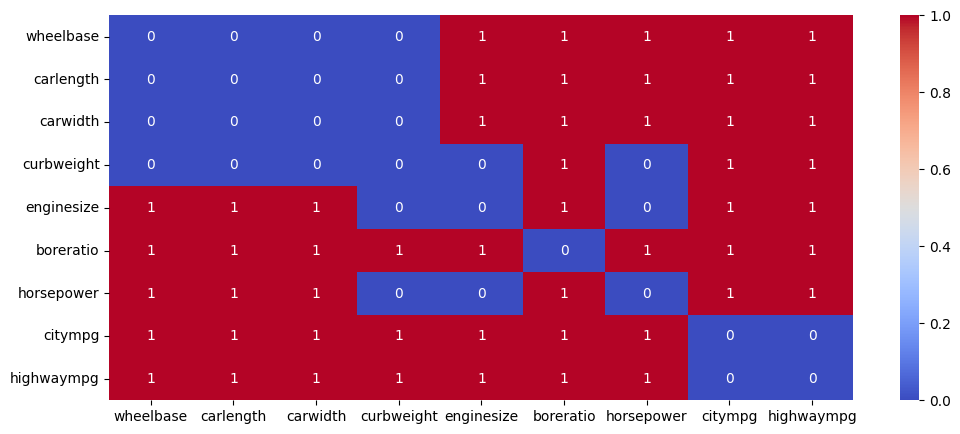

In [292]:
import seaborn as sns
numeric_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 4))

sns.heatmap(
    corr_matrix,
    annot=True,        
    fmt=".2f",        
    cmap="Blues",   
    linewidths=0.5
)

plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.heatmap(x.corr(numeric_only=True)<0.75, annot=True,cmap='coolwarm')
plt.show()

Relationship of Each Numerical Column with Target (Price)

correlations


wheelbase → Moderate positive 0.58 

bore ratio → Moderate positive 0.55


stroke → Weak positive 0.08


compression ratio → Weak positive 0.07 (unrelevant)


peak rpm → Strong negative -0.09 (unrelevant)


city mpg → Strong negative -0.69


highway mpg → Strong negative -0.70


symboling → Weak negative -0.08


enginesize → Strong positive 0.87


horsepower → Strong positive 0.81


curbweight → Strong positive 0.84


carwidth → Moderate to weak positive 0.12


carlength → Moderate positive 0.68


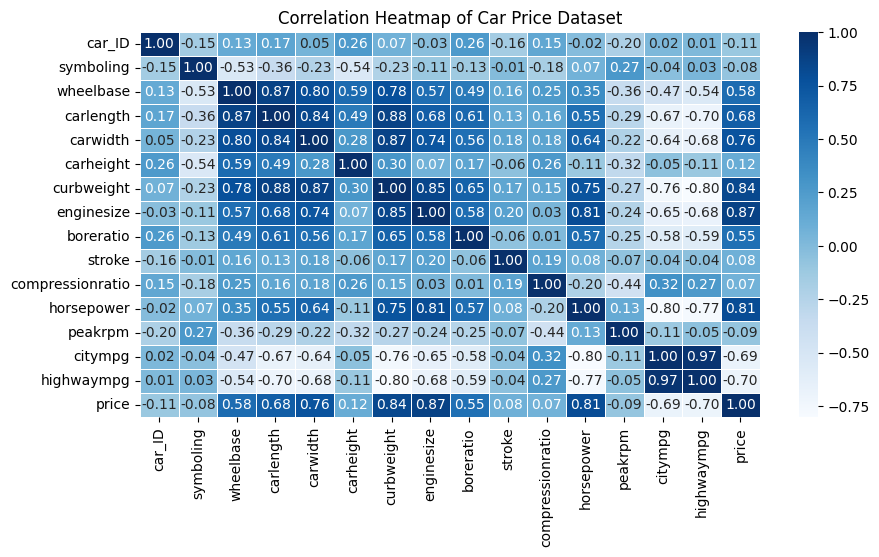

,Correlation Value,Relationship Type
price,1.000000,Strong Positive
enginesize,0.874145,Strong Positive
curbweight,0.835305,Strong Positive
horsepower,0.808139,Strong Positive
carwidth,0.759325,Strong Positive
carlength,0.682920,Moderate Positive
wheelbase,0.577816,Moderate Positive
boreratio,0.553173,Moderate Positive
carheight,0.119336,Weak Positive
stroke,0.079443,Weak Positive


In [293]:
import seaborn as sns
numeric_data = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix,
    annot=True,        
    fmt=".2f",        
    cmap="Blues",   
    linewidths=0.5
)

plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()

def classify_correlation(value):
    abs_val = abs(value)

    if abs_val >= 0.7:
        strength = "Strong"
    elif abs_val >= 0.3:
        strength = "Moderate"
    else:
        strength = "Weak"

    direction = "Positive" if value > 0 else "Negative" if value < 0 else "None"

    return f"{strength} {direction}"

price_corr = corr_matrix['price']

correlation_summary = pd.DataFrame({
    "Correlation Value": price_corr,
    "Relationship Type": price_corr.apply(classify_correlation)
})

correlation_summary.sort_values(by="Correlation Value", ascending=False)

- we can remove near to 0 i.e weak positive and week negative
  (symboling,peakrpm,car_ID,carheight,stroke,compressionratio)
- >0.7 || 0.75

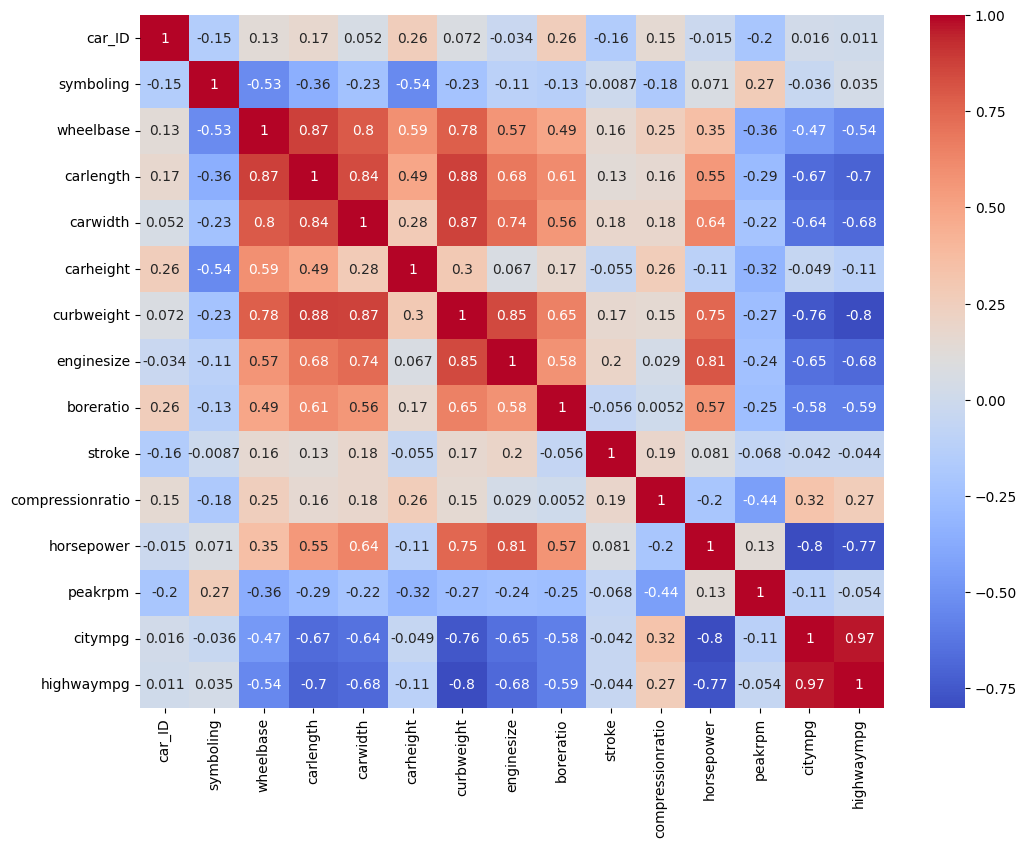

In [294]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

- this feature to feature relation is called multi colinearity in ml

- Regularization

- feature -feature
 >0.75

    1.  Wheelbase - carlength (0.87)
    2.  wheelbase - carwidth (0.8)
    3.  wheelbase - curbweight (0.78)
    4. carlength - carwidth (0.8)
    5. carlength - carbweight (0.88)
    6. carwidth - carbweight (0.87)
    7. carbweight - horsepower (0.75)
    8. horsepower - enginesize (0.81)

- columns with <0.1 features to be removed (feature to target) (week values===week relationship)

    1. symboling
    2. stroke
    3. compressionratio
    4. peakrpm

- columns  nearer to zero compared with feature-feature and target then remove them
 




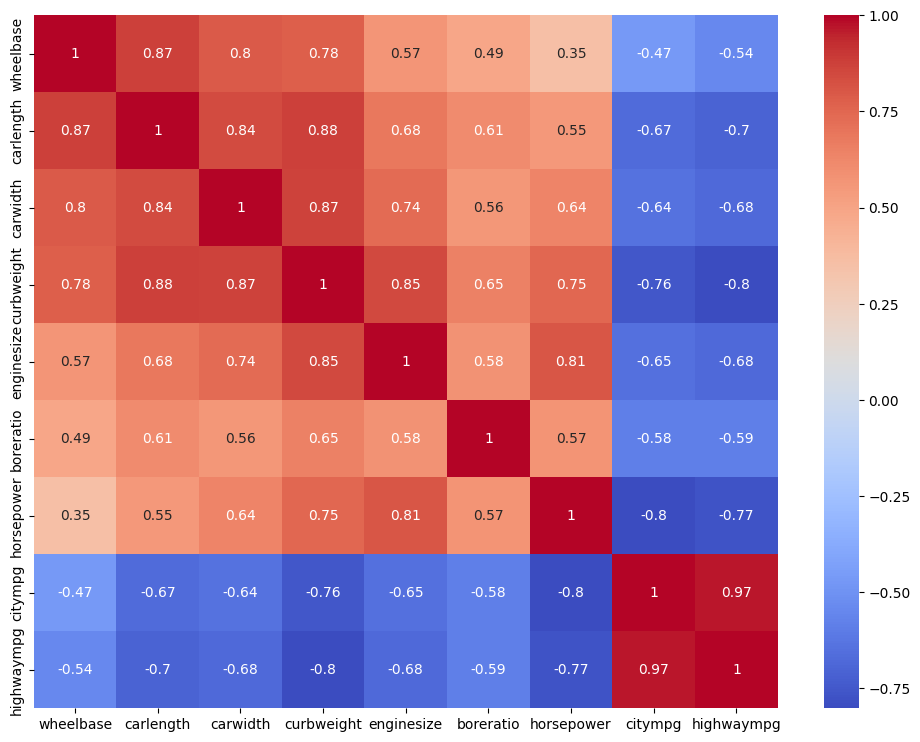

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [295]:
x=numeric_data.drop(['symboling','stroke','compressionratio','peakrpm','car_ID','carheight','price'],axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
print(df.columns)

In [296]:
y=df['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train,x_test


model=LinearRegression()
model.fit(x_train,y_train)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

Slope (m): 53.05508409732514
Intercept (c): -44059.70252314481
Mean Squared Error: 14323594.598549714
r2_score: 0.8185601083027604


- we have regularization methods to make it simple(high varience,poor generalization and complexity)
    1. lasso
    2. ridge

- we add some penality to the cost function

- we use gradient desecnt to find best weights(minimize errors)

alpha value =>  we use ridge cv algorithm

In [297]:
from sklearn.linear_model import Ridge,Lasso
print

lasso_model = Lasso(alpha=0.01)  # smaller alpha to avoid over-penalization
lasso_model.fit(x_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(x_test)

# Evaluation
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso R²: 0.8185594282724111
Lasso MSE: 14323648.282879798


In [313]:
from sklearn.linear_model import Ridge,Lasso

from sklearn.linear_model import Ridge
 
 
alphas=np.arange(0.1,10,0.05)
model=RidgeCV(alphas=alphas)
model.fit(x_train, y_train)
 
# Predictions
y_pred_Ridge = model.predict(x_test)

# Evaluation
print(model.alpha_)
print("Ridge R²:", r2_score(y_test, y_pred_Ridge))
print("ridge MSE:", mean_squared_error(y_test, y_pred_Ridge))
print("best score: ",model.score(x_test,y_test))

9.950000000000003
Ridge R²: 0.8179031519247106
ridge MSE: 14375457.3765755
best score:  0.8179031519247106


In [309]:
from sklearn.linear_model import Ridge,Lasso

from sklearn.linear_model import LassoCV
 
 
alphas=np.arange(0.1,10,0.05)
model=LassoCV(alphas=alphas)
model.fit(x_train, y_train)
 
# Predictions
y_pred_Lasso = model.predict(x_test)

# Evaluation
print(model.alpha_)
print("Ridge R²:", r2_score(y_test, y_pred_Lasso))
print("ridge MSE:", mean_squared_error(y_test, y_pred_Lasso))
print("best score: ",model.score(x_test,y_test))


9.950000000000003
Ridge R²: 0.8178557828189879
ridge MSE: 14379196.884246722
best score:  0.8178557828189879
